### aim: 

### date: 

In [62]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [63]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [64]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
import pprod_hf as hf
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [65]:
tom_diadT = xr.open_mfdataset(hf.make_yearlist_tom(1955,1960,'diad_T','TOM12_TJ_1ASA'))
tylist = hf.make_yearlist(1955, 1960, rname = 'bc370', ftype = 'CHLTADIC')
ukesm_chlds = xr.open_mfdataset(tylist)

tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
tmesh['csize'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]

ukmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/MEDUSA/mesh_mask_eORCA1_wrk.nc')
ukmesh['area'] = ukmesh.tmask[0,:,:] * ukmesh.e1t[:,:] * ukmesh.e2t[:,:]
ukesm_chlds['TChl'] = ukesm_chlds.CHD + ukesm_chlds.CHN


In [66]:
reload(hf)

<module 'pprod_hf' from '/gpfs/scratch/mep22dku/SOZONE/MEDUSA/pprod_hf.py'>

In [67]:
help(hf.plot_southern)

Help on function plot_southern in module pprod_hf:

plot_southern(fig, ax1, lons, lats, tdat, setlim=False, tvmin=0, tvmax=1, tticks=[0, 1], northex=-50, fs=12, tit='', cbarlab='', tcmap='viridis', lm=True, cbr=True)



In [68]:
tom_diadT.TChl

<xarray.DataArray 'TChl' (time_counter: 72, deptht: 31, y: 149, x: 182)>
dask.array<concatenate, shape=(72, 31, 149, 182), dtype=float32, chunksize=(12, 31, 149, 182), chunktype=numpy.ndarray>
Coordinates:
    nav_lat        (y, x) float32 dask.array<chunksize=(149, 182), meta=np.ndarray>
    nav_lon        (y, x) float32 dask.array<chunksize=(149, 182), meta=np.ndarray>
  * deptht         (deptht) float32 4.999938 15.000288 ... 4749.913 5250.2266
    time_centered  (time_counter) object dask.array<chunksize=(12,), meta=np.ndarray>
  * time_counter   (time_counter) object 1955-01-16 12:00:00 ... 1960-12-16 1...
Dimensions without coordinates: y, x
Attributes:
    long_name:           total Chl
    units:               g Chl/L
    online_operation:    average
    interval_operation:  5760 s
    interval_write:      1 month
    cell_methods:        time: mean (interval: 5760 s)

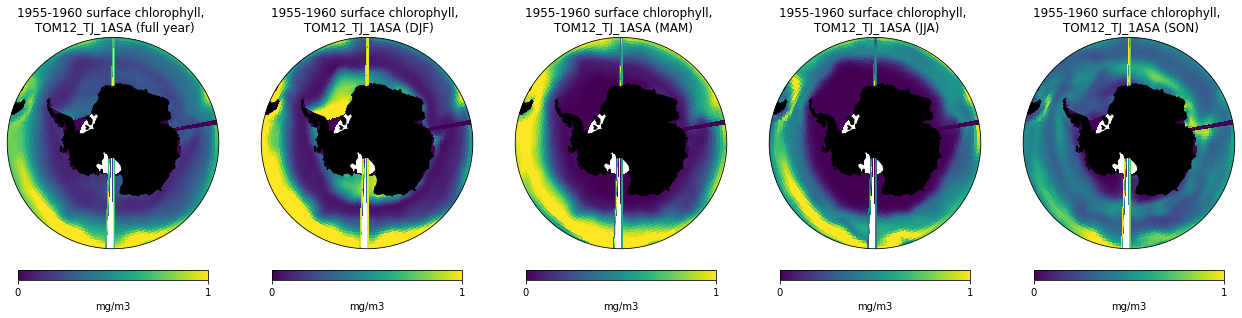

In [69]:
fact2 = 1e6
avg_chl = tom_diadT.TChl.isel(deptht = 0).isel(y = slice(0,50)).sel(time_counter=(tom_diadT['time_counter.season'] == 'DJF')).\
mean(dim = 'time_counter')

fact = 1.1
#fig, axs = plt.subplots(1, 1, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
tfig = plt.figure(figsize=[20*fact, 6*fact])

lons = tmesh['nav_lon'][0:50,:].values
lats = tmesh['nav_lat'][0:50,:].values

ax1 = tfig.add_subplot(1, 5, 1, projection=ccrs.Orthographic(0, -90))
avg_chl = tom_diadT.TChl.isel(deptht = 0).isel(y = slice(0,50)).\
mean(dim = 'time_counter').values*fact2

hf.plot_southern(tfig, ax1, lons, lats, avg_chl, setlim = True, tvmin = 0, tvmax = 1, tticks = [0, 1], cbarlab = 'mg/m3',\
                tit = '1955-1960 surface chlorophyll, \n TOM12_TJ_1ASA (full year)')

ax1 = tfig.add_subplot(1, 5, 2, projection=ccrs.Orthographic(0, -90))
avg_chl = tom_diadT.TChl.isel(deptht = 0).isel(y = slice(0,50)).sel(time_counter=(tom_diadT['time_counter.season'] == 'DJF')).\
mean(dim = 'time_counter').values*fact2
hf.plot_southern(tfig, ax1, lons, lats, avg_chl, setlim = True, tvmin = 0, tvmax = 1, tticks = [0, 1], cbarlab = 'mg/m3',\
                tit = '1955-1960 surface chlorophyll, \n TOM12_TJ_1ASA (DJF)')

ax1 = tfig.add_subplot(1, 5, 3, projection=ccrs.Orthographic(0, -90))
avg_chl = tom_diadT.TChl.isel(deptht = 0).isel(y = slice(0,50)).sel(time_counter=(tom_diadT['time_counter.season'] == 'MAM')).\
mean(dim = 'time_counter').values*fact2
hf.plot_southern(tfig, ax1, lons, lats, avg_chl, setlim = True, tvmin = 0, tvmax = 1, tticks = [0, 1], cbarlab = 'mg/m3',\
                tit = '1955-1960 surface chlorophyll, \n TOM12_TJ_1ASA (MAM)')

ax1 = tfig.add_subplot(1, 5, 4, projection=ccrs.Orthographic(0, -90))
avg_chl = tom_diadT.TChl.isel(deptht = 0).isel(y = slice(0,50)).sel(time_counter=(tom_diadT['time_counter.season'] == 'JJA')).\
mean(dim = 'time_counter').values*fact2
hf.plot_southern(tfig, ax1, lons, lats, avg_chl, setlim = True, tvmin = 0, tvmax = 1, tticks = [0, 1], cbarlab = 'mg/m3',\
                tit = '1955-1960 surface chlorophyll, \n TOM12_TJ_1ASA (JJA)')

ax1 = tfig.add_subplot(1, 5, 5, projection=ccrs.Orthographic(0, -90))
avg_chl = tom_diadT.TChl.isel(deptht = 0).isel(y = slice(0,50)).sel(time_counter=(tom_diadT['time_counter.season'] == 'SON')).\
mean(dim = 'time_counter').values*fact2
hf.plot_southern(tfig, ax1, lons, lats, avg_chl, setlim = True, tvmin = 0, tvmax = 1, tticks = [0, 1], cbarlab = 'mg/m3',\
                tit = '1955-1960 surface chlorophyll, \n TOM12_TJ_1ASA (SON)')

<xarray.DataArray 'TChl' (y: 50, x: 182)>
dask.array<mean_agg-aggregate, shape=(50, 182), dtype=float32, chunksize=(50, 182), chunktype=numpy.ndarray>
Coordinates:
    nav_lat  (y, x) float32 dask.array<chunksize=(50, 182), meta=np.ndarray>
    nav_lon  (y, x) float32 dask.array<chunksize=(50, 182), meta=np.ndarray>
    deptht   float32 4.999938
Dimensions without coordinates: y, x


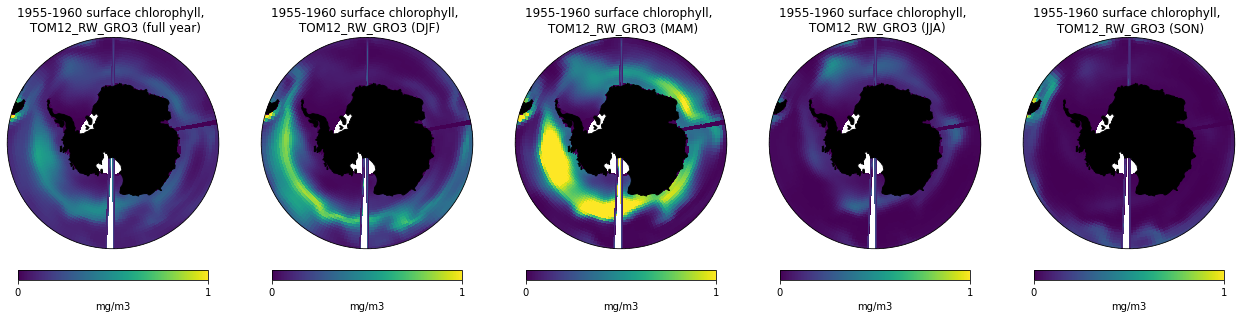

In [72]:
tom_diadT = xr.open_mfdataset(hf.make_yearlist_tom(1955,1960,'diad_T','TOM12_RW_GRO3'))

fact2 = 1e6
avg_chl = tom_diadT.TChl.isel(deptht = 0).isel(y = slice(0,50)).sel(time_counter=(tom_diadT['time_counter.season'] == 'DJF')).\
mean(dim = 'time_counter')

print(avg_chl)

fact = 1.1
#fig, axs = plt.subplots(1, 1, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
tfig = plt.figure(figsize=[20*fact, 6*fact])

lons = tmesh['nav_lon'][0:50,:].values
lats = tmesh['nav_lat'][0:50,:].values

ax1 = tfig.add_subplot(1, 5, 1, projection=ccrs.Orthographic(0, -90))
avg_chl = tom_diadT.TChl.isel(deptht = 0).isel(y = slice(0,50)).\
mean(dim = 'time_counter').values*fact2

hf.plot_southern(tfig, ax1, lons, lats, avg_chl, setlim = True, tvmin = 0, tvmax = 1, tticks = [0, 1], cbarlab = 'mg/m3',\
                tit = '1955-1960 surface chlorophyll, \n TOM12_RW_GRO3 (full year)')

ax1 = tfig.add_subplot(1, 5, 2, projection=ccrs.Orthographic(0, -90))
avg_chl = tom_diadT.TChl.isel(deptht = 0).isel(y = slice(0,50)).sel(time_counter=(tom_diadT['time_counter.season'] == 'DJF')).\
mean(dim = 'time_counter').values*fact2
hf.plot_southern(tfig, ax1, lons, lats, avg_chl, setlim = True, tvmin = 0, tvmax = 1, tticks = [0, 1], cbarlab = 'mg/m3',\
                tit = '1955-1960 surface chlorophyll, \n TOM12_RW_GRO3 (DJF)')

ax1 = tfig.add_subplot(1, 5, 3, projection=ccrs.Orthographic(0, -90))
avg_chl = tom_diadT.TChl.isel(deptht = 0).isel(y = slice(0,50)).sel(time_counter=(tom_diadT['time_counter.season'] == 'MAM')).\
mean(dim = 'time_counter').values*fact2
hf.plot_southern(tfig, ax1, lons, lats, avg_chl, setlim = True, tvmin = 0, tvmax = 1, tticks = [0, 1], cbarlab = 'mg/m3',\
                tit = '1955-1960 surface chlorophyll, \n TOM12_RW_GRO3 (MAM)')

ax1 = tfig.add_subplot(1, 5, 4, projection=ccrs.Orthographic(0, -90))
avg_chl = tom_diadT.TChl.isel(deptht = 0).isel(y = slice(0,50)).sel(time_counter=(tom_diadT['time_counter.season'] == 'JJA')).\
mean(dim = 'time_counter').values*fact2
hf.plot_southern(tfig, ax1, lons, lats, avg_chl, setlim = True, tvmin = 0, tvmax = 1, tticks = [0, 1], cbarlab = 'mg/m3',\
                tit = '1955-1960 surface chlorophyll, \n TOM12_RW_GRO3 (JJA)')

ax1 = tfig.add_subplot(1, 5, 5, projection=ccrs.Orthographic(0, -90))
avg_chl = tom_diadT.TChl.isel(deptht = 0).isel(y = slice(0,50)).sel(time_counter=(tom_diadT['time_counter.season'] == 'SON')).\
mean(dim = 'time_counter').values*fact2
hf.plot_southern(tfig, ax1, lons, lats, avg_chl, setlim = True, tvmin = 0, tvmax = 1, tticks = [0, 1], cbarlab = 'mg/m3',\
                tit = '1955-1960 surface chlorophyll, \n TOM12_RW_GRO3 (SON)')

KeyboardInterrupt: 

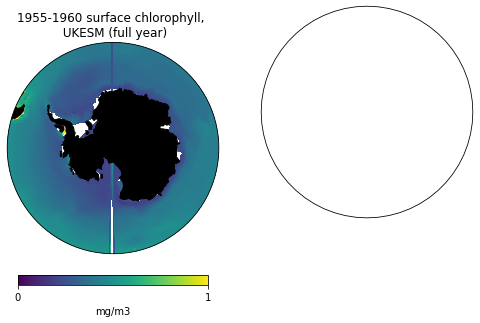

In [71]:
fact = 1.1
#fig, axs = plt.subplots(1, 1, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
tfig = plt.figure(figsize=[20*fact, 6*fact])
fact2 = 1

lons = ukmesh['nav_lon'][0:140,:].values
lats = ukmesh['nav_lat'][0:140,:].values

ax1 = tfig.add_subplot(1, 5, 1, projection=ccrs.Orthographic(0, -90))
avg_chl = ukesm_chlds.TChl.isel(deptht = 0).isel(y = slice(0,140)).\
mean(dim = 'time_counter').values*fact2

hf.plot_southern(tfig, ax1, lons, lats, avg_chl, setlim = True, tvmin = 0, tvmax = 1, tticks = [0, 1],
cbarlab = 'mg/m3',\
                tit = '1955-1960 surface chlorophyll, \n UKESM (full year)')

ax1 = tfig.add_subplot(1, 5, 2, projection=ccrs.Orthographic(0, -90))
avg_chl = ukesm_chlds.TChl.isel(deptht = 0).isel(y = slice(0,140)).sel(time_counter=(ukesm_chlds['time_counter.season'] == 'DJF')).\
mean(dim = 'time_counter').values*fact2
hf.plot_southern(tfig, ax1, lons, lats, avg_chl, setlim = True, tvmin = 0, tvmax = 1, tticks = [0, 1],
cbarlab = 'mg/m3',\
                tit = '1955-1960 surface chlorophyll, \n UKESM (DJF)')

ax1 = tfig.add_subplot(1, 5, 3, projection=ccrs.Orthographic(0, -90))
avg_chl = ukesm_chlds.TChl.isel(deptht = 0).isel(y = slice(0,140)).sel(time_counter=(ukesm_chlds['time_counter.season'] == 'MAM')).\
mean(dim = 'time_counter').values*fact2
hf.plot_southern(tfig, ax1, lons, lats, avg_chl, setlim = True, tvmin = 0, tvmax = 1, tticks = [0, 1],
cbarlab = 'mg/m3',\
                tit = '1955-1960 surface chlorophyll, \n UKESM (MAM)')

ax1 = tfig.add_subplot(1, 5, 4, projection=ccrs.Orthographic(0, -90))
avg_chl = ukesm_chlds.TChl.isel(deptht = 0).isel(y = slice(0,140)).sel(time_counter=(ukesm_chlds['time_counter.season'] == 'JJA')).\
mean(dim = 'time_counter').values*fact2
hf.plot_southern(tfig, ax1, lons, lats, avg_chl, setlim = True, tvmin = 0, tvmax = 1, tticks = [0, 1],
cbarlab = 'mg/m3',\
                tit = '1955-1960 surface chlorophyll, \n UKESM (JJA)')

ax1 = tfig.add_subplot(1, 5, 5, projection=ccrs.Orthographic(0, -90))
avg_chl = ukesm_chlds.TChl.isel(deptht = 0).isel(y = slice(0,140)).sel(time_counter=(ukesm_chlds['time_counter.season'] == 'SON')).\
mean(dim = 'time_counter').values*fact2
hf.plot_southern(tfig, ax1, lons, lats, avg_chl, setlim = True, tvmin = 0, tvmax = 1, tticks = [0, 1],
cbarlab = 'mg/m3',\
                tit = '1955-1960 surface chlorophyll, \n UKESM (SON)')